# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [12]:
# Imports
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [15]:
df_class = pd.read_csv(r'C:\Users\bioni\OneDrive\Documents\GitHub\Coding_Temple\Week 4\Assignments\D4\classification-practice-main\data\possum.csv')

df_class.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [31]:
print(df_class.columns)
df_class.describe()


Index(['site', 'pop', 'sex', 'age', 'head_l', 'skull_w', 'total_l', 'tail_l'], dtype='object')


,site,age,head_l,skull_w,total_l,tail_l
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.759615,92.602885,56.883654,87.088462,37.009615
std,2.349086,1.963231,3.573349,3.113426,4.310549,1.959518
min,1.000000,0.000000,82.500000,50.000000,75.000000,32.000000
25%,1.000000,2.000000,90.675000,54.975000,84.000000,35.875000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000


### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [32]:
df_class.info()
df_class.fillna(0, inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   sex      104 non-null    object 
 3   age      104 non-null    float64
 4   head_l   104 non-null    float64
 5   skull_w  104 non-null    float64
 6   total_l  104 non-null    float64
 7   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ KB


In [46]:
df_class.drop(['sex'], axis= 1, inplace= True)
df_class.info()
df_class['age'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   age      104 non-null    float64
 3   head_l   104 non-null    float64
 4   skull_w  104 non-null    float64
 5   total_l  104 non-null    float64
 6   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.8+ KB


3.0    27
2.0    16
4.0    14
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
0.0     2
8.0     1
Name: age, dtype: int64

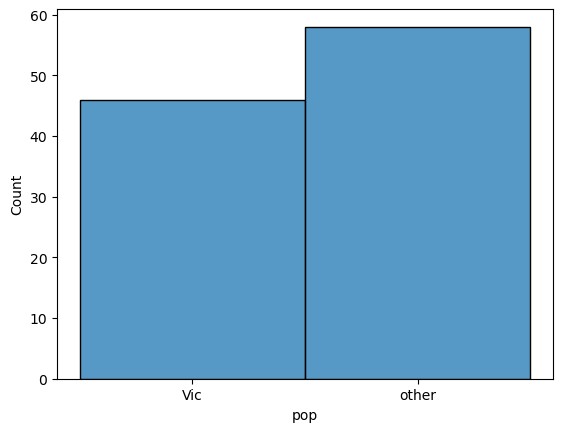

In [47]:
sns.histplot(data=df_class, x='pop');

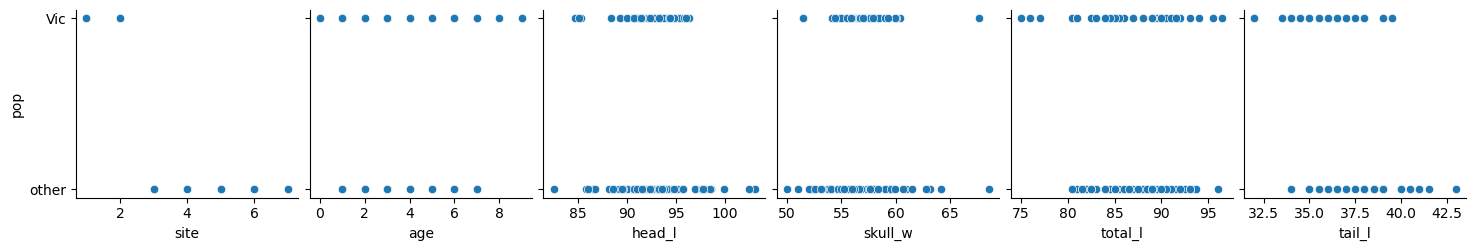

In [60]:
sns.pairplot(data= df_class, y_vars= 'pop');

### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

In [49]:
# step 1: Identify the target vector
target = 'pop'

# Step 2: Separate out the target vector from the feature matrix. We also drop any columns in which we do not want to use for our classification vector.
X = df_class.drop(columns = [target, 'pop'])
y = df_class[target]

# Step 3: Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state= 42)

# Assert Statement
assert len(X_train) + len(X_test) == len(X), 'data did not split correctly'

In [61]:
print(X_test.shape)
print(y_train.shape)

(21, 6)
(83,)


In [62]:
print('Training Score')
df_class(X_train, y_train)
print('-------------------')
print('Testing Score')
df_class(X_test, y_test)

Training Score


TypeError: 'DataFrame' object is not callable

In [81]:
df_class['pop'].value_counts(normalize = True)

other    0.557692
Vic      0.442308
Name: pop, dtype: float64

In [78]:
base = (df_class['pop'].value_counts(normalize= True)*100).round(2)
print(f' Our baseline model can predict our majority class, pop, for each row and be correct {base}% of the time!')

 Our baseline model can predict our majority class, pop, for each row and be correct other    55.77
Vic      44.23
Name: pop, dtype: float64% of the time!


In [82]:
# Logistic Regression - used for classification tasks, not regression (weird s-curve in regression line)

lr_pipe = make_pipeline(
    LogisticRegression(random_state= 42),
)

lr_pipe.fit(X_train, y_train)

c:\Users\bioni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression(random_state=42))])

In [75]:
print('Training Score')
print(lr_pipe.score(X_train, y_train))
print('-------------------')
print('Testing Score')
lr_pipe.score(X_test, y_test)

Training Score
0.9879518072289156
-------------------
Testing Score


0.9523809523809523

In [83]:
print('Logistic Regression:')
print(f'Training Accuracy: {lr_pipe.score(X_train, y_train)*100}')
print(f'Testing Accuracy: {lr_pipe.score(X_test, y_test)*100}')
print('----------------------------')
print('Logistic Regression:')
print(f'Training Accuracy: {roc_auc_score(y_train, lr_pipe.predict(X_train))*100}')
print(f'Testing Accuracy: {roc_auc_score(y_test, lr_pipe.predict_proba(X_test), multi_class= "ovr")*100}')

Logistic Regression:
Training Accuracy: 98.79518072289156
Testing Accuracy: 95.23809523809523
----------------------------
Logistic Regression:


ValueError: could not convert string to float: 'other'

['site' 'age' 'head_l' 'skull_w' 'total_l' 'tail_l']
[[ 2.63819314  0.04713023 -0.10223871 -0.17250381  0.16242137  0.15669453]]


<Axes: >

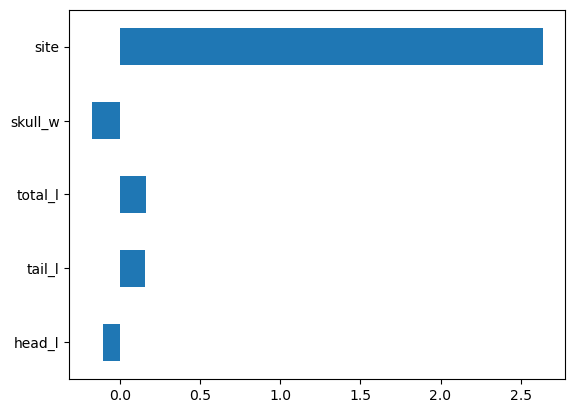

In [65]:
coefficients = lr_pipe.steps[0][1].coef_
features = lr_pipe.feature_names_in_

print(features)
print(coefficients)

feat_imp = pd.Series(coefficients[0], index= features).sort_values(key=abs)
feat_imp.tail().plot(kind = 'barh')

### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [66]:
import numpy as np
param_grid = {
    'logisticregression__C' : np.arange(0.1, 2.0,0.2)

}
clf = RandomizedSearchCV(lr_pipe, param_grid) 
clf.fit(X_train, y_train)

c:\Users\bioni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bioni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(estimator=Pipeline(steps=[('logisticregression',
                                              LogisticRegression(random_state=42))]),
                   param_distributions={'logisticregression__C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])})

In [72]:
clf.best_params_

{'logisticregression__C': 0.7000000000000001}

In [68]:
clf.best_score_

0.9882352941176471